In [2]:


import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes
from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline

#%matplotlib widget

astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16


['HCOp-J1_Dendrogram_CMZ' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'] ['HCOp-J1_Dendrogram' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
(15,)
(15,)


FileNotFoundError: [Errno 2] No such file or directory: '5Radii.npy'

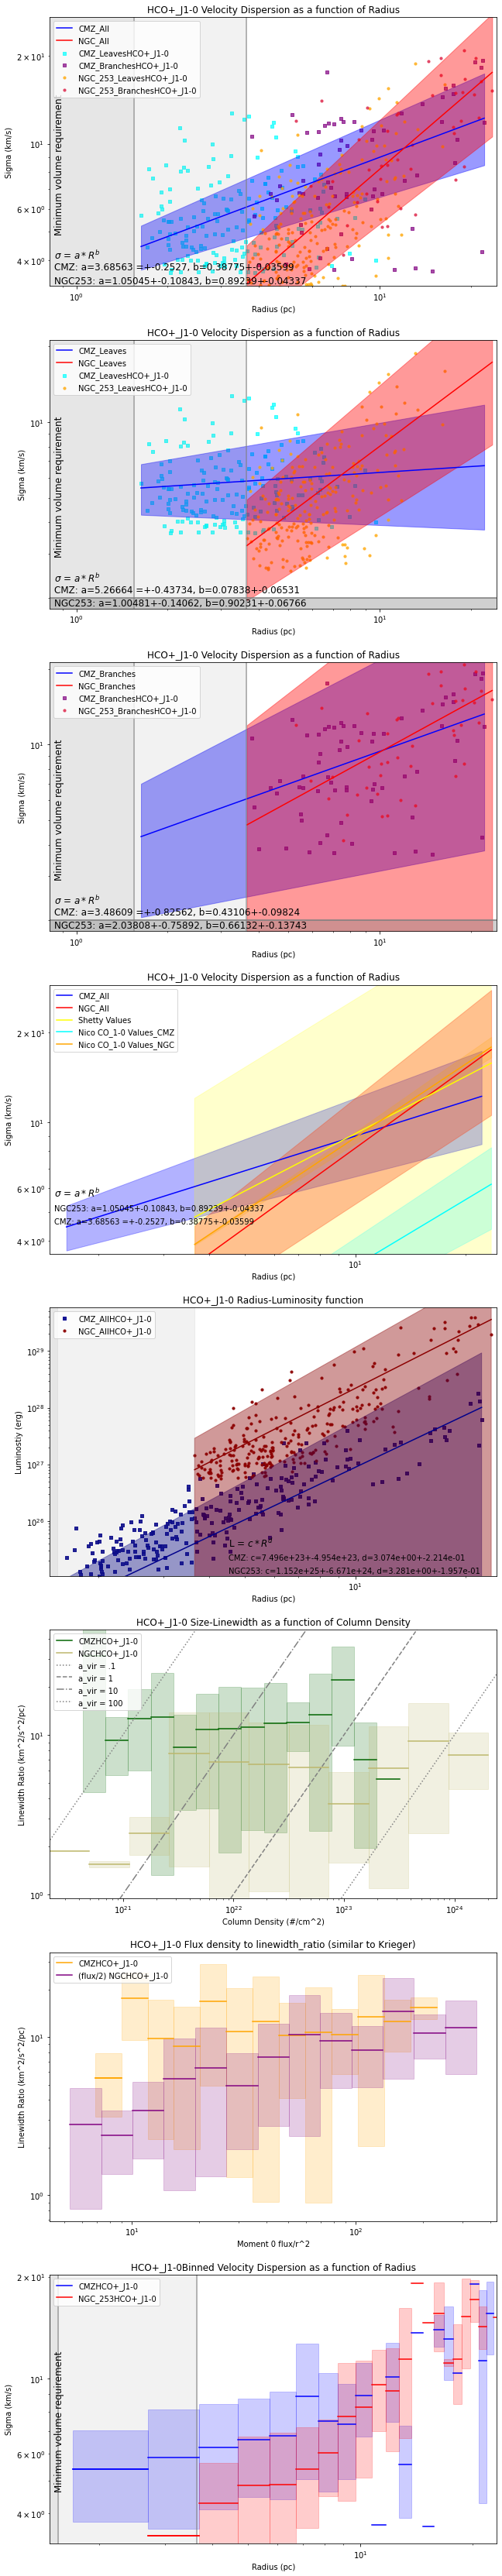

In [4]:

Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO_3_2"]


NGCNames = np.load("Names.npy")

print(Names,NGCNames)
#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
NGCNamesMols = [NGCNames[0],NGCNames[1],NGCNames[2],NGCNames[5],NGCNames[3]]




Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(0,2):
    if i ==1:
        i=4
    #make minimum space line
    
    ysp=2#SpecRes[i]
    xsp=SpRes[i]*np.sqrt(Bars[i])#SpRes[i]
    Nysp=2#NSpecRes[i]
    Nxsp=NSpRes[i]*np.sqrt(NBars[i])
    
    
    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.1,500,100)
    L=np.linspace(-1,20,10)
    for t in range(100):
        ps = 0
        xsps.append(xsp)
        ysps.append(ysp)
        
        Nxsps.append(Nxsp)
        Nysps.append(Nysp)
        
        Nminsigs.append(np.roots([rs[t]**2,-NSpecRes[i]*3*NSpRes[i]**2])[0]) #Solve for the minimum sigma value for a given radius
        minsigs.append(np.roots([rs[t]**2,-SpecRes[i]*3*SpRes[i]**2*2.0475**2*1.3807])[0])
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii.npy"
    sname=Names[i]+"Sigmas.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii.npy"
    NGCsname=NGCNamesMols[i]+"Sigmas.npy"
    
    radsBase = np.load(rname,allow_pickle=True)*10**6#pc
    sigsBase = np.load(sname,allow_pickle=True)#km/s
    #print(radsBase)
    
    radsNGCBase = np.load(NGCrname,allow_pickle=True)*10**6
    sigsNGCBase = np.load(NGCsname,allow_pickle=True)
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    
    LuminBase = np.load(Names[i]+"_Luminosities.npy",allow_pickle=True)
    
    Lumin = np.concatenate((LuminBase[0],LuminBase[1]))
    LuminNGCBase = np.load(NGCNamesMols[i]+"_Luminosities.npy",allow_pickle=True)
    LuminNGC = np.concatenate((LuminNGCBase[0],LuminNGCBase[1]))
    
    ColumnBase = np.load(Names[i]+"_Column.npy",allow_pickle=True)
    Column = np.concatenate((ColumnBase[0],ColumnBase[1]))
    ColumnNGCBase = np.load(NGCNamesMols[i]+"_Column.npy",allow_pickle=True)
    ColumnNGC = np.concatenate((ColumnNGCBase[0],ColumnNGCBase[1]))
    
    Flux = np.load(Names[i]+"Flux_Dense.npy",allow_pickle=True)
    FluxNGC = np.load(NGCNamesMols[i]+"Flux_Dense.npy",allow_pickle=True)/2#They use a mass conversion factor 1/2 of the CMZ factor for NGC253, so i divide this flux by 2 for now
    RGPFF = np.load(Names[i]+"Rad_For_Flux.npy",allow_pickle=True)
    RGPFFNGC = np.load(NGCNamesMols[i]+"Rad_For_Flux.npy",allow_pickle=True)
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    (popt2, pcov2),(poptT, pcovT) =(curve_fit(func, radsB, sigsB)),(curve_fit(func, rads,sigs))
    
    try:
        (popt, pcov) = (curve_fit(func, radsL, sigsL))
    except:
        (popt, pcov) = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    (Npopt2, Npcov2),(NpoptT, NpcovT) = (curve_fit(func, radsNGCB, sigsNGCB)),(curve_fit(func, radsNGC,sigsNGC ))
    
    try:
        (Npopt, Npcov) = (curve_fit(func, radsNGCL, sigsNGCL))
    except:
        (Npopt, Npcov) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        
        gp = np.where(LuminNGC>0)
        Nlgp = LuminNGC[gp]
        Nradgp = radsNGC[gp]
        (NpoptLum, NpcovLum)  = curve_fit(func, np.array(Nradgp,dtype='float64'),np.array(Nlgp,dtype='float64'),maxfev=9999999,p0 = np.array([10**25,2],dtype='float64'),ftol = 10**-13)
    except:
        (NpoptLum, NpcovLum) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp = np.where(Lumin>0)
        lgp = Lumin[gp]
        radgp = rads[gp]
        (poptLum, pcovLum)  = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**25,2],dtype='float64'),ftol = 10**-13)

    except:
        (poptLum, pcovLum) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp2 = np.where(Column>0)
        cgp = Column[gp2]
        rgp=sigs[gp2]**2/rads[gp2]
        (poptCD, pcovCD) = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
    except:
        (poptCD, pcovCD) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp2 = np.where(ColumnNGC>0)
        Ncgp = ColumnNGC[gp2]
        Nrgp=sigsNGC[gp2]**2/radsNGC[gp2]
        (NpoptCD, NpcovCD) = curve_fit(func, np.array(Ncgp,dtype='float64') ,np.array(Nrgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
    except:
        (NpoptCD, NpcovCD) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
           
    
    
    
    axA = pylab.subplot(8,5, i+1)
    axL = pylab.subplot(8,5, i+6)
    axB = pylab.subplot(8,5, i+11)
    
    axNM = pylab.subplot(8,5, i+16)
    
    axLum = pylab.subplot(8,5, i+21)
    axCol = pylab.subplot(8,5, i+26)
    axFlux = pylab.subplot(8,5, i+31)
    
    #Lum and CD Both
    xsLS = axLum.scatter(radgp, lgp,c="darkblue",alpha=.9,label=("CMZ_All"+CMZLs[i]),marker='s',s=10,facecolors='Dark Blue')
    NxsLS = axLum.scatter(Nradgp, Nlgp,c="darkred",alpha=.9,label=("NGC_All"+CMZLs[i]),marker='o',s=10,facecolors='Dark Blue')
    
    #xsCD = axCol.scatter(cgp,rgp,c="darkgreen",alpha=.9,label=("CMZ_All"+CMZLs[i]),marker='s',s=10,facecolors='Dark Blue')
    #NxsCD = axCol.scatter(Ncgp,Nrgp,c="darkkhaki",alpha=.9,label=("NGC_All"+CMZLs[i]),marker='o',s=10,facecolors='Dark Blue')
    
    
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    
    er_r=2
    yusLum  = func(xs, poptLum[0]+np.sqrt(pcovLum[0][0])*er_r,poptLum[1]+np.sqrt(pcovLum[1][1])*er_r)
    ylsLum  = func(xs, poptLum[0]-np.sqrt(pcovLum[0][0])*er_r,poptLum[1]-np.sqrt(pcovLum[1][1])*er_r)
    xpaFLum = axLum.fill_between(xs,ylsLum,yusLum,color="darkblue",alpha=.4)
    xpaLum = axLum.plot(xs,func(xs, poptLum[0],poptLum[1]),color="darkblue",alpha=1)
    
    NyusLum  = func(Nxs, NpoptLum[0]+np.sqrt(NpcovLum[0][0])*er_r,NpoptLum[1]+np.sqrt(NpcovLum[1][1])*er_r)
    NylsLum  = func(Nxs, NpoptLum[0]-np.sqrt(NpcovLum[0][0])*er_r,NpoptLum[1]-np.sqrt(NpcovLum[1][1])*er_r)
    NxpaFLum = axLum.fill_between(Nxs,NylsLum,NyusLum,color="darkred",alpha=.4)
    NxpaLum = axLum.plot(Nxs,func(Nxs, NpoptLum[0],NpoptLum[1]),color="darkred",alpha=1)
    
    ######################
    ##Cd
    
    
    
    #bw = (np.nanmax(cgp)-np.nanmin(cgp))/100
    #bins = np.linspace(np.nanmin(cgp),np.nanmax(cgp),100)
    bins = np.logspace(np.log10(np.nanmin(cgp)),np.log10(np.nanmax(cgp)),15)
    #numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    print(np.shape(bins))
    Bin_SL=[]
    SL_err=[]
    Bin_CD=[]
    
    NBin_SL=[]
    NSL_err=[]
    NBin_CD=[]
    for lmi in range(len(bins)-1):
        SLBin=[]
        for lmj in range(len(cgp)):
            if(cgp[lmj]>bins[lmi] and cgp[lmj]<bins[lmi+1]):
                SLBin.append(rgp[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            Bin_SL.append(np.nanmean(SLBin))
            SL_err.append(np.nanstd(SLBin))
        else:
            Bin_SL.append(np.nan)
            SL_err.append(np.nan)
    #Nbins = np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),int((np.nanmax(Ncgp)-np.nanmin(Ncgp))/bw))
    Nbins = np.logspace(np.log10(np.nanmin(Ncgp)),np.log10(np.nanmax(Ncgp)),15)
    for lmi in range(len(Nbins)-1):
        SLBin=[]
        for lmj in range(len(Ncgp)):
            if(Ncgp[lmj]>Nbins[lmi] and Ncgp[lmj]<Nbins[lmi+1]):
                SLBin.append(Nrgp[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            NBin_SL.append(np.nanmean(SLBin))
            NSL_err.append(np.nanstd(SLBin))
        else:
            NBin_SL.append(np.nan)
            NSL_err.append(np.nan)
    #print("M",bins,Nbins,Bin_SL,NBin_SL)
    #width = bw
    er_r = 1
    from matplotlib.patches import Rectangle
    bw = (bins[0+1]-bins[0])
    xp1BinC = axCol.plot([bins[0],bins[1]], [Bin_SL[0],Bin_SL[0]],c="darkgreen",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(bins)-1):
        bw = (bins[w+1]-bins[w])
        xp1BinC = axCol.plot([bins[w],bins[w+1]], [Bin_SL[w],Bin_SL[w]],c="darkgreen",alpha=1)
        #err_tipsC = axCol.plot([bins[w]-bw/2,bins[w]+bw/2], [Bin_SL[w]+SL_err[w]*er_r,Bin_SL[w]+SL_err[w]*er_r],c="darkgreen",alpha=1)
        #err_tupsC = axCol.plot([bins[w]-bw/2,bins[w]+bw/2], [Bin_SL[w]-SL_err[w]*er_r,Bin_SL[w]-SL_err[w]*er_r],c="darkgreen",alpha=1)
        axCol.add_patch(Rectangle(
            xy=(bins[w], Bin_SL[w]-SL_err[w]*er_r) ,width=bw, height=SL_err[w]*er_r*2,
            linewidth=1, color='darkgreen', fill=True,alpha=.2,))
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axCol.plot([Nbins[0],Nbins[1]], [NBin_SL[0],NBin_SL[0]],c="darkkhaki",alpha=1,label=("NGC"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axCol.plot([Nbins[w],Nbins[w+1]], [NBin_SL[w],NBin_SL[w]],c="darkkhaki",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axCol.add_patch(Rectangle(
            xy=(Nbins[w], NBin_SL[w]-NSL_err[w]*er_r) ,width=bw, height=NSL_err[w]*er_r*2,
            linewidth=1, color='darkkhaki', fill=True,alpha=.2,))
    er_r = 2  
        

        
    NCxs=np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),50)
    Cxs=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
    
    yusCol  = func(Cxs, poptCD[0]+np.sqrt(pcovCD[0][0])*er_r,poptCD[1]+np.sqrt(pcovCD[1][1])*er_r)
    ylsCol  = func(Cxs, poptCD[0]-np.sqrt(pcovCD[0][0])*er_r,poptCD[1]-np.sqrt(pcovCD[1][1])*er_r)
    #xpaFCol = axCol.fill_between(Cxs,ylsCol,yusCol,color="darkgreen",alpha=.4)
    #xpaCol = axCol.plot(Cxs,func(Cxs, poptCD[0],poptCD[1]),color="darkgreen",alpha=1)
    
    NyusCol  = func(NCxs, NpoptCD[0]+np.sqrt(NpcovCD[0][0])*er_r,NpoptCD[1]+np.sqrt(NpcovCD[1][1])*er_r)
    NylsCol  = func(NCxs, NpoptCD[0]-np.sqrt(NpcovCD[0][0])*er_r,NpoptCD[1]-np.sqrt(NpcovCD[1][1])*er_r)
    #NxpaFCol = axCol.fill_between(NCxs,NylsCol,NyusCol,color="darkkhaki",alpha=.4)
    #NxpaCol = axCol.plot(NCxs,func(NCxs, NpoptCD[0],NpoptCD[1]),color="darkkhaki",alpha=1)
    
    A_vir = .1
    f=5/3
    G = 6.67408*10**-20#*u.km**3*u.kg**-1*u.s**-2# km3 kg-1 s-2
    
    pc_2_km=3.086*10**13#*u.km/u.parsec#km/pc
    
    Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
    
    NbinsPlot = np.linspace(np.nanmin(Ncgp)*.01,np.nanmax(Ncgp)*100,100)
    
    
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle=':',label=("a_vir = .1"))
    
    A_vir = 1
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dashed',label=("a_vir = 1"))
    
    A_vir = 10
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dashdot',label=("a_vir = 10"))
    
    A_vir = 100
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dotted',label=("a_vir = 100"))
    
    #########
    
    #Making same thing but for flux density
    
    #########
    
    
    Flux
    FluxNGC
    RGPFF
    RGPFFNGC
    
    
    bins_FF = np.logspace(np.log10(np.nanmin(Flux)),np.log10(np.nanmax(Flux)),15)
    #numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    print(np.shape(bins))
    Bin_SL_FF=[]
    SL_err_FF=[]
    Bin_F=[]
    
    NBin_SL_FF=[]
    NSL_err_FF=[]
    NBin_F=[]
    for lmi in range(len(bins_FF)-1):
        SLBin=[]
        for lmj in range(len(Flux)):
            if(Flux[lmj]>bins_FF[lmi] and Flux[lmj]<bins_FF[lmi+1]):
                SLBin.append(RGPFF[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            Bin_SL_FF.append(np.nanmean(SLBin))
            SL_err_FF.append(np.nanstd(SLBin))
        else:
            Bin_SL_FF.append(np.nan)
            SL_err_FF.append(np.nan)
    #Nbins = np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),int((np.nanmax(Ncgp)-np.nanmin(Ncgp))/bw))
    Nbins_FF = np.logspace(np.log10(np.nanmin(FluxNGC)),np.log10(np.nanmax(FluxNGC)),15)
    for lmi in range(len(Nbins_FF)-1):
        SLBin=[]
        for lmj in range(len(FluxNGC)):
            if(FluxNGC[lmj]>Nbins_FF[lmi] and FluxNGC[lmj]<Nbins_FF[lmi+1]):
                SLBin.append(RGPFFNGC[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            NBin_SL_FF.append(np.nanmean(SLBin))
            NSL_err_FF.append(np.nanstd(SLBin))
        else:
            NBin_SL_FF.append(np.nan)
            NSL_err_FF.append(np.nan)
    #print("M",bins,Nbins,Bin_SL,NBin_SL)
    #width = bw
    er_r = 1
    
    bw = (bins_FF[0+1]-bins_FF[0])
    xp1BinF = axFlux.plot([bins_FF[0],bins_FF[1]], [Bin_SL_FF[0],Bin_SL_FF[0]],c="orange",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(bins_FF)-1):
        bw = (bins_FF[w+1]-bins_FF[w])
        xp1BinF = axFlux.plot([bins_FF[w],bins_FF[w+1]], [Bin_SL_FF[w],Bin_SL_FF[w]],c="orange",alpha=1)
        
        axFlux.add_patch(Rectangle(
            xy=(bins_FF[w], Bin_SL_FF[w]-SL_err_FF[w]*er_r) ,width=bw, height=SL_err_FF[w]*er_r*2,
            linewidth=1, color='orange', fill=True,alpha=.2,))
    
    bw = (Nbins_FF[0+1]-Nbins_FF[0])
    Nxp1BinF = axFlux.plot([Nbins_FF[0],Nbins_FF[1]], [NBin_SL[0],NBin_SL[0]],c="purple",alpha=1,label=("(flux/2) NGC"+CMZLs[i]))
    for w in range(len(Nbins_FF)-1):
        bw = (Nbins_FF[w+1]-Nbins_FF[w])
        Nxp1BinF = axFlux.plot([Nbins_FF[w],Nbins_FF[w+1]], [NBin_SL_FF[w],NBin_SL_FF[w]],c="purple",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axFlux.add_patch(Rectangle(
            xy=(Nbins_FF[w], NBin_SL_FF[w]-NSL_err_FF[w]*er_r) ,width=bw, height=NSL_err_FF[w]*er_r*2,
            linewidth=1, color='purple', fill=True,alpha=.2,))
    er_r = 2  
    
    
    ##########
    #print(xs,Nxs,yusLum)
    
    #leaves and branches CMZ
    xp1L = axL.scatter(radsL, sigsL,c="Cyan",alpha=.7,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1B = axB.scatter(radsB, sigsB,c="Purple",alpha=.7,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    xp1AL = axA.scatter(radsL, sigsL,c="Cyan",alpha=.7,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1AB = axA.scatter(radsB, sigsB,c="Purple",alpha=.7,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    
    
    ysL,ysB,ysT=func(xs,popt[0],popt[1]),func(xs,popt2[0],popt2[1]), func(xs,poptT[0],poptT[1])
    xpaL,xpaB,xpaT = axL.plot(xs,ysL,c='Blue',label="CMZ_Leaves"),axB.plot(xs,ysB,c='Blue',label="CMZ_Branches"),axA.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    
    
    er_r=2
    yusL,yusB,yusT  = func(xs, popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]+np.sqrt(pcov2[0][0])*er_r,popt2[1]+np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsL,ylsB,ylsT  = func(xs, popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]-np.sqrt(pcov2[0][0])*er_r,popt2[1]-np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaFL,xpaFB,xpaFT = axL.fill_between(xs,ylsL,yusL,color="Blue",alpha=.4),axB.fill_between(xs,ylsB,yusB,color="Blue",alpha=.4),axA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
    
    cmzT2F = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.3)
    cmzT2 = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    #cmzNMF = axNM.fill_between(xs,ysNM_L,ysNM_U,color="Purple",alpha=.3)
    #cmzNM = axNM.plot(xs,ysNM,c='Purple',label='Noise-modified CMZ average of 100 runs (All)')
    
    if(i==1):
        percent = 1
    else:
        percent = 1
    Nxp1L = axL.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1B = axB.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    Nxp1AL = axA.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1AB = axA.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    
    
    NysL,NysB,NysT=func(Nxs,Npopt[0],Npopt[1]),func(Nxs,Npopt2[0],Npopt2[1]), func(Nxs,NpoptT[0],NpoptT[1])
    NxpaL,NxpaB,NxpaT = axL.plot(Nxs,NysL,c='Red',label="NGC_Leaves"),axB.plot(Nxs,NysB,c='Red',label="NGC_Branches"),axA.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    er_r=2
    NyusL,NyusB,NyusT  = func(Nxs, Npopt[0]+np.sqrt(Npcov[0][0])*er_r,Npopt[1]+np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]+np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]+np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsL,NylsB,NylsT  = func(Nxs, Npopt[0]-np.sqrt(Npcov[0][0])*er_r,Npopt[1]-np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]-np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]-np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFL,NxpaFB,NxpaFT = axL.fill_between(Nxs,NylsL,NyusL,color="Red",alpha=.4),axB.fill_between(Nxs,NylsB,NyusB,color="Red",alpha=.4),axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
    
    
    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axNM.plot(Nxs,SP,c='Yellow',label='Shetty Values')
    ShettyFill = axNM.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    
    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    
    NI = func(Nxs,NicoCOCoef(NicoCO_10,NicoCO),NicoCO)
    NIU = func(Nxs,NicoCOCoef(NicoCO_10+NicoCO_10Err*er_r,NicoCO+NicoCOErr*er_r),NicoCO+ NicoCOErr*er_r)
    NIL = func(Nxs,NicoCOCoef(NicoCO_10-NicoCO_10Err*er_r,NicoCO-NicoCOErr*er_r),NicoCO- NicoCOErr*er_r)
    
    NicoNM = axNM.plot(Nxs,NI,c='Cyan',label='Nico CO_1-0 Values_CMZ')
    NicoFill = axNM.fill_between(Nxs,NIL,NIU,color="Cyan",alpha=.2)
    
    NNI = func(Nxs,NicoCOCoef(NNicoCO_10,NNicoCO),NNicoCO)
    NNIU = func(Nxs,NicoCOCoef(NNicoCO_10+NNicoCO_10Err*er_r,NNicoCO+NNicoCOErr*er_r),NNicoCO+ NNicoCOErr*er_r)
    NNIL = func(Nxs,NicoCOCoef(NNicoCO_10-NNicoCO_10Err*er_r,NNicoCO-NNicoCOErr*er_r),NNicoCO- NNicoCOErr*er_r)
    
    NNicoNM = axNM.plot(Nxs,NNI,c='Orange',label='Nico CO_1-0 Values_NGC')
    NNicoFill = axNM.fill_between(Nxs,NNIL,NNIU,color="Orange",alpha=.2)
    
    
    
    
    axL.set_xlabel("Radius (pc)")
    axL.set_ylabel("Sigma (km/s)")
    axB.set_xlabel("Radius (pc)")
    axB.set_ylabel("Sigma (km/s)")
    axA.set_xlabel("Radius (pc)")
    axA.set_ylabel("Sigma (km/s)")
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel("Sigma (km/s)")
    axCol.set_xlabel("Column Density (#/cm^2)")
    axCol.set_ylabel("Linewidth Ratio (km^2/s^2/pc)")
    axLum.set_xlabel("Radius (pc)")
    axLum.set_ylabel("Luminostiy (erg)")
    axFlux.set_xlabel("Moment 0 flux/r^2")
    axFlux.set_ylabel("Linewidth Ratio (km^2/s^2/pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    axB.set_yscale('log')
    axB.set_xscale('log')
    axL.set_yscale('log')
    axL.set_xscale('log')
    axLum.set_yscale('log')
    axLum.set_xscale('log')
    axCol.set_yscale('log')
    axCol.set_xscale('log')
    axNM.set_yscale('log')
    
    axNM.set_xscale('log')
    axFlux.set_yscale('log')
    axFlux.set_xscale('log')
    axA.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.1),xycoords="axes fraction")  
    axB.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.1),xycoords="axes fraction")  
    axL.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.1),xycoords="axes fraction")  
    axNM.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.21),xycoords="axes fraction")
    axLum.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.4,0.11),xycoords="axes fraction")
    stL= ("CMZ: a="+str(round(popt[0],5))+" =+-" + str(round(np.sqrt(pcov[0][0]),5)) +", b="+str(round(popt[1],5))+"+-" + str(round(np.sqrt(pcov[1][1]),5)) )
    stB= ("CMZ: a="+str(round(popt2[0],5))+" =+-" + str(round(np.sqrt(pcov2[0][0]),5)) +", b="+str(round(popt2[1],5))+"+-" + str(round(np.sqrt(pcov2[1][1]),5)) )
    stA= ("CMZ: a="+str(round(poptT[0],5))+" =+-" + str(round(np.sqrt(pcovT[0][0]),5)) +", b="+str(round(poptT[1],5))+"+-" + str(round(np.sqrt(pcovT[1][1]),5)) )
    
    axA.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axA.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigs)*1.4)
    axL.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axL.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axB.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axB.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axNM.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axNM.set_ylim(np.nanmin(sigs),np.nanmax(sigs)*1.5)
    axLum.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axLum.set_ylim(np.nanmin(Lumin),np.nanmax(LuminNGC)*1.5)
    axCol.set_xlim(np.nanmin(cgp)*.5,np.nanmax(Ncgp)*1.2)
    axCol.set_ylim(np.nanmin(sigsNGC**2/radsNGC),np.nanmax(sigsNGC**2/radsNGC)*1.5)
    NstA= ("NGC253: a="+str(round(NpoptT[0],5))+"+-" + str(round(np.sqrt(NpcovT[0][0]),5)) +", b="+str(round(NpoptT[1],5))+"+-" + str(round(np.sqrt(NpcovT[1][1]),5)) )
    NstB= ("NGC253: a="+str(round(Npopt2[0],5))+"+-" + str(round(np.sqrt(Npcov2[0][0]),5)) +", b="+str(round(Npopt2[1],5))+"+-" + str(round(np.sqrt(Npcov2[1][1]),5)) )
    NstL= ("NGC253: a="+str(round(Npopt[0],5))+"+-" + str(round(np.sqrt(Npcov[0][0]),5)) +", b="+str(round(Npopt[1],5))+"+-" + str(round(np.sqrt(Npcov[1][1]),5)) )
    
    axA.annotate(s=stA,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axA.annotate(s=NstA,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axA.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axB.annotate(s=stB,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axB.annotate(s=NstB,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axB.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axL.annotate(s=stL,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")  
    
    axL.annotate(s=NstL,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction") 
    
    axL.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    NstLum= ("NGC253: c="+str(np.format_float_scientific(NpoptLum[0],3))+"+-" + str(np.format_float_scientific(np.sqrt(NpcovLum[0][0]),3)) +", d="+str(np.format_float_scientific(NpoptLum[1],3))+"+-" + str(np.format_float_scientific(np.sqrt(NpcovLum[1][1]),3)) )
    stLum= ("CMZ: c="+str(np.format_float_scientific(poptLum[0],3))+"+-" + str(np.format_float_scientific(np.sqrt(pcovLum[0][0]),3)) +", d="+str(np.format_float_scientific(poptLum[1],3))+"+-" + str(np.format_float_scientific(np.sqrt(pcovLum[1][1]),3)) )
    axLum.annotate(s=NstLum,fontsize=10,xy=(0.4,0.01),xycoords="axes fraction")
    axLum.annotate(s=stLum,fontsize=10,xy=(0.4,0.06),xycoords="axes fraction")
    #axNM.annotate(s=stNM,fontsize=10,xy=(0.01,0.06),xycoords="axes fraction")  
    
    #axNM.annotate(s=NstNM,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=10,xy=(0.01,0.11),xycoords="axes fraction")  
    
    axNM.annotate(s=NstA,fontsize=10,xy=(0.01,0.16),xycoords="axes fraction") 
    #pylab.show()
    axB.legend(loc='upper left')
    axL.legend(loc='upper left')
    axA.legend(loc='upper left')
    axNM.legend(loc='upper left')
    #ax.legend(loc='upper left')
    axCol.legend(loc='upper left')
    axLum.legend(loc='upper left')
    axFlux.legend(loc='upper left')
    
    axA.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axB.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axL.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axNM.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axCol.title.set_text((CMZLs[i]+" Size-Linewidth as a function of Column Density"))
    axLum.title.set_text((CMZLs[i]+" Radius-Luminosity function"))
    axFlux.title.set_text((CMZLs[i]+" Flux density to linewidth_ratio (similar to Krieger)"))

    
    
    
    
    
    bw = 1#pc
    
    cp=1.7
    Bin_Sigs=[]
    Sigs_err=[]
    Bin_Rads=[]
    
    NBin_Sigs=[]
    NSigs_err=[]
    NBin_Rads=[]
    while(True):
        Sbin=[]
        if(cp>max(rads)):
            break
        for k in range(len(rads)):
            if(rads[k]>cp and rads[k]<cp+bw):
                Sbin.append(sigs[k])
        if(str(np.nanmean(Sbin))!=str(np.nan) and str(np.nanmean(Sbin))!= str(np.inf)):
            Bin_Sigs.append(np.nanmean(Sbin))
            Sigs_err.append(np.nanstd(Sbin))
            Bin_Rads.append(cp+bw/2)
        cp+=bw
    cp=1.7
    while(True):
        NSbin=[]
        if(cp>max(radsNGC)):
            break
        for k in range(len(radsNGC)):
            if(radsNGC[k]>cp and radsNGC[k]<cp+bw):
                NSbin.append(sigsNGC[k])
        if(str(np.nanmean(NSbin))!=str(np.nan) and str(np.nanmean(NSbin))!= str(np.inf)):
            NBin_Sigs.append(np.nanmean(NSbin))
            NSigs_err.append(np.nanstd(NSbin))
            NBin_Rads.append(cp+bw/2)
        cp+=bw
    
    
    def func(R,a,b):
        return a*R**(b)
    poptBin, pcovBin = curve_fit(func, Bin_Rads, Bin_Sigs)
    
    
    NpoptBin, NpcovBin = curve_fit(func, NBin_Rads, NBin_Sigs)
    
    
    ax4= pylab.subplot(8,5, i+36)
    
    
    #minVol = ax4.plot(line,minsigs,color="gray",alpha=.7)
    #NminVol = ax4.plot(line,Nminsigs,color="gray",alpha=.7)
    #minVol = ax4.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    Nymin1,Nymin2,Nymin3,Nymin4 = ax4.plot(line,Nysps,color="gray",alpha=.7),axL.plot(line,Nysps,color="gray",alpha=.7),axA.plot(line,Nysps,color="gray",alpha=.7),axB.plot(line,Nysps,color="gray",alpha=.7)
    ymin1,ymin2,ymin3,ymin4 = ax4.plot(line,ysps,color="gray",alpha=.7),axL.plot(line,ysps,color="gray",alpha=.7),axA.plot(line,ysps,color="gray",alpha=.7),axB.plot(line,ysps,color="gray",alpha=.7)
    
    NyminF1,NyminF2,NyminF3,NyminF4 = ax4.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axL.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axB.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axA.fill_between(line,Nysps,zeros,color="gray",alpha=.2)
    yminF1,yminF2,yminF3,yminF4 = ax4.fill_between(line,ysps,zeros,color="gray",alpha=.2),axL.fill_between(line,ysps,zeros,color="gray",alpha=.2),axB.fill_between(line,ysps,zeros,color="gray",alpha=.2),axA.fill_between(line,ysps,zeros,color="gray",alpha=.2)
    
    
    Nxmin1,Nxmin2,Nxmin3,Nxmin4 = ax4.plot(Nxsps,line,color="gray",alpha=.7),axL.plot(Nxsps,line,color="gray",alpha=.7),axB.plot(Nxsps,line,color="gray",alpha=.7),axA.plot(Nxsps,line,color="gray",alpha=.7)
    xmin1,xmin2,xmin3,xmin4 =  axL.plot(xsps,line,color="gray",alpha=.7), axB.plot(xsps,line,color="gray",alpha=.7), axA.plot(xsps,line,color="gray",alpha=.7), ax4.plot(xsps,line,color="gray",alpha=.7)
    
    lineL = np.linspace(0,10**33,100)
    NxminF1,NxminF2,NxminF3,NxminF4,NxminF5 = axA.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axLum.fill_betweenx(lineL,Nxsps,zeros,color="gray",alpha=.1)
    
    xminF1,xminF2,xminF3,xminF4,xminF5 = axA.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axLum.fill_betweenx(lineL,xsps,zeros,color="gray",alpha=.1)
    
    
    
    
    
    '''
    xp1Bin = ax4.scatter(Bin_Rads, Bin_Sigs,c="Blue",alpha=.3,label=("CMZ"+CMZLs[i]),marker='s')
    
    xsBin=np.linspace(np.nanmin(Bin_Rads),np.nanmax(rads),50)
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    xpaBin = ax4.plot(xsBin,ysBin,c='Blue')
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    yusBin  = func(xsBin, poptBin[0]+np.sqrt(pcovBin[0][0])*2,poptBin[1]+np.sqrt(pcovBin[1][1])*2)
    ylsBin  = func(xsBin, poptBin[0]-np.sqrt(pcovBin[0][0])*2,poptBin[1]-np.sqrt(pcovBin[1][1])*2)
    xpa2Bin = ax4.fill_between(xsBin,ylsBin,yusBin,color="Blue",alpha=.4)
    
    Nxp1Bin = ax4.scatter(NBin_Rads, NBin_Sigs,c="Red",alpha=.3,label=("NGC_253"+CMZLs[i]),marker='o')
    
    NxsBin=np.linspace(np.nanmin(NBin_Rads),np.nanmax(radsNGC),50)
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    Nxpa1Bin = ax4.plot(NxsBin,NysBin,c="Red")
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    NyusBin  = func(NxsBin, NpoptBin[0]+np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]+np.sqrt(NpcovBin[1][1])*2)
    NylsBin  = func(NxsBin, NpoptBin[0]-np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]-np.sqrt(NpcovBin[1][1])*2)
    Nxpa2Bin = ax4.fill_between(NxsBin,NylsBin,NyusBin,color="Red",alpha=.4)
    '''
    
    
    er_r=1
    
    xsBin=np.linspace(np.nanmin(Bin_Rads),np.nanmax(rads),50)
    width = bw
    from matplotlib.patches import Rectangle
    xp1Bin = ax4.plot([Bin_Rads[0]-bw/2,Bin_Rads[0]+bw/2], [Bin_Sigs[0],Bin_Sigs[0]],c="Blue",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(Bin_Rads)):
        xp1Bin = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w],Bin_Sigs[w]],c="Blue",alpha=1)
        #err_tips = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w]+Sigs_err[w]*er_r,Bin_Sigs[w]+Sigs_err[w]*er_r],c="Blue",alpha=1)
        #err_tups = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w]-Sigs_err[w]*er_r,Bin_Sigs[w]-Sigs_err[w]*er_r],c="Blue",alpha=1)
        ax4.add_patch(Rectangle(
            xy=(Bin_Rads[w]-width/2, Bin_Sigs[w]-Sigs_err[w]*er_r) ,width=width, height=Sigs_err[w]*er_r*2,
            linewidth=1, color='blue', fill=True,alpha=.2,))
    NxsBin=np.linspace(np.nanmin(NBin_Rads),np.nanmax(radsNGC),50)
    
    width = bw
    Nxp1Bin = ax4.plot([NBin_Rads[0]-bw/2,NBin_Rads[0]+bw/2], [NBin_Sigs[0],NBin_Sigs[0]],c="Red",alpha=1,label=("NGC_253"+CMZLs[i]))
    for w in range(len(NBin_Rads)):
        Nxp1Bin = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w],NBin_Sigs[w]],c="Red",alpha=1)
        #Nerr_tips = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w]+NSigs_err[w]*er_r,NBin_Sigs[w]+NSigs_err[w]*er_r],c="Red",alpha=1)
        #Nerr_tups = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w]-NSigs_err[w]*er_r,NBin_Sigs[w]-NSigs_err[w]*er_r],c="Red",alpha=1)
        ax4.add_patch(Rectangle(
            xy=(NBin_Rads[w]-width/2, NBin_Sigs[w]-NSigs_err[w]*er_r) ,width=width, height=NSigs_err[w]*er_r*2,
            linewidth=1, color='red', fill=True,alpha=.2,))
    
    
    ax4.set_xlabel("Radius (pc)")
    ax4.set_ylabel("Sigma (km/s)")
    ax4.set_yscale('log')
    ax4.set_xscale('log')

    #ax4.annotate(s=r'$\sigma$ = $a*R^b$',fontRadius=10,xy=(0,0.11),xycoords="axes fraction")  
    #st= ("CMZ: a="+str(round(poptBin[0],5))+" =+-" + str(round(np.sqrt(pcovBin[0][0]),5)) +", b="+str(round(poptBin[1],5))+"+-" + str(round(np.sqrt(pcovBin[1][1]),5)) )
    ax4.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.05)
    ax4.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigs)*1.05)
    #Nst= ("NGC253: a="+str(round(NpoptBin[0],5))+"+-" + str(round(np.sqrt(NpcovBin[0][0]),5)) +", b="+str(round(NpoptBin[1],5))+"+-" + str(round(np.sqrt(NpcovBin[1][1]),5)) )
    
    #ax4.annotate(s=st,fontsize=10,xy=(0,0.06),xycoords="axes fraction")  
    #ax4.annotate(s=Nst,fontsize=10,xy=(0,0.01),xycoords="axes fraction")  
    #pylab.show()
    ax4.legend(loc='upper left')
    ax4.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    ax4.title.set_text((CMZLs[i]+"Binned Velocity Dispersion as a function of Radius"))
    
    
    #Plot virial expected sigma-r relation ship, ref: https://arxiv.org/pdf/2008.02518.pdf 5.1
    
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots.jpeg")
    

In [1]:
#All Galaxies comp

#Load in data from the 100 noise_modified runs
CENames_CMZ =np.load("C_Exp_Names_CMZ.npy")
CCNames_CMZ = np.load("C_Coef_Names_CMZ.npy")
p = np.load("C_Exp_Names.npy")
p2 = np.load("C_Coef_Names.npy")
CENames_NGC = [p[0],p[1],p[2],p[5]]
CCNames_NGC = [p2[0],p2[1],p2[2],p2[5]]
#Get data for the actual dendograms
RNames = np.load("RNames_CMZ.npy")
SNames = np.load("SNames_CMZ.npy")
print(RNames)
CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0"]
NGCRNames = np.load("RNames.npy")
NGCSNames = np.load("SNames.npy")
ONGCR = [NGCRNames[0],NGCRNames[1],NGCRNames[2],NGCRNames[5]]
ONGCS = [NGCSNames[0],NGCSNames[1],NGCSNames[2],NGCSNames[5]]
Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")
SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")
fig = plt.figure(1,figsize=(35,35))


for i in range(4):
    #make minimum space line
    
    ysp=2#SpecRes[i]
    xsp=SpRes[i]*np.sqrt(Bars[i])#SpRes[i]
    Nysp=2#NSpecRes[i]
    Nxsp=NSpRes[i]*np.sqrt(NBars[i])
    
    
    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.1,500,100)
    L=np.linspace(-1,20,10)
    for t in range(100):
        ps = 0
        xsps.append(xsp)
        ysps.append(ysp)
        
        Nxsps.append(Nxsp)
        Nysps.append(Nysp)
        
        Nminsigs.append(np.roots([rs[t]**2,-NSpecRes[i]*3*NSpRes[i]**2])[0]) #Solve for the minimum sigma value for a given radius
        minsigs.append(np.roots([rs[t]**2,-SpecRes[i]*3*SpRes[i]**2*2.0475**2*1.3807])[0])
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    rnameNA = RNames[i]+"_NA"
    snameNA = SNames[i]+"_NA"
    
    NGCrnameNA = ONGCR[i]+"_NA"
    NGCsnameNA = ONGCS[i]+"_NA"
    
    radsNA = np.load(rnameNA)*10**6#pc
    sigsNA = np.load(snameNA)
    
    radsNGCNA = np.load(NGCrnameNA)*10**6
    sigsNGCNA = np.load(NGCsnameNA)
    
    
    
    rnameL=RNames[i]+"_Leaves.npy"
    snameL=SNames[i]+"_Leaves.npy"
    rnameB=RNames[i]+"_Branches.npy"
    snameB=SNames[i]+"_Branches.npy"
    
    NGCrnameL=ONGCR[i]+"_Leaves.npy"
    NGCsnameL=ONGCS[i]+"_Leaves.npy"
    NGCrnameB=ONGCR[i]+"_Branches.npy"
    NGCsnameB=ONGCS[i]+"_Branches.npy"
    
    radsL = np.load(rnameL)*10**6#pc
    sigsL = np.load(snameL)
    rads[0] = np.load(rnameB)*10**6#pc
    sigs[1][1] = np.load(snameB)
    
    radsNGCL = np.load(NGCrnameL)*10**6
    sigsNGCL = np.load(NGCsnameL)
    radsNGCB = np.load(NGCrnameB)*10**6
    sigsNGCB = np.load(NGCsnameB)
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,rads[0])), np.concatenate((sigsL,sigs[1][1]))
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    
    (poptT, pcovT) =(curve_fit(func, rads,sigs))
    
    (NpoptT, NpcovT) = (curve_fit(func, radsNGC,sigsNGC ))
    
           
    poptNA,pcovNA = curve_fit(func, radsNA, sigsNA)
    NpoptNA,NpcovNA = curve_fit(func, radsNGCNA, sigsNGCNA)
    
    #Get average fit data for the Noise-modified runs
    CMZ_C = np.load((CCNames_CMZ[i]+".npy"))[2]#For all structures
    CMZ_E = np.load((CENames_CMZ[i]+".npy"))[2]
    
    C_Cmz,C_Cmz_Err = np.nanmean(CMZ_C),np.std(CMZ_C)
    E_Cmz,E_Cmz_Err = np.nanmean(CMZ_E),np.std(CMZ_E)
    
    
    NGC_C = np.load((CCNames_NGC[i]+".npy"))[2]
    NGC_E = np.load((CENames_NGC[i]+".npy"))[2]
    #print(NGC_C,NGC_E)
    C_Ngc,C_Ngc_Err = np.nanmean(NGC_C),np.std(NGC_C)
    E_Ngc,E_Ngc_Err = np.nanmean(NGC_E),np.std(NGC_E)
    
    axA = pylab.subplot(3,5, i+1)
    
    axNM = pylab.subplot(3,5, i+6)
    
    axNA = pylab.subplot(3,5, i+11)
    #No abs both
    xsNAp = axNA.scatter(radsNA, sigsNA,c="Dark Blue",alpha=.7,label=("CMZ_No_Abs_All"+CMZLs[i]),marker='x',s=10)
    NxsNAp = axNA.scatter(radsNGCNA, sigsNGCNA,c="Dark Red",alpha=.7,label=("NGC_No_Abs_All"+CMZLs[i]),marker='x',s=10)
    
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    ysT=func(xs,poptT[0],poptT[1])
    xpaT = axA.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    
    xsNA=np.linspace(np.nanmin(radsNA),np.nanmax(radsNA),50)
    ysNA=func(xsNA,poptNA[0],poptNA[1])
    xpaNA = axNA.plot(xsNA,ysNA,c='Dark Blue',label='CMZ_No_Abs_All')
    
    
    
    er_r=2
    yusT  = func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsT  = func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaFT = axA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
    
    ysNM = func(xs,C_Cmz,E_Cmz)
    ysNM_U = func(xs, C_Cmz+(C_Cmz_Err)*er_r,E_Cmz+(E_Cmz_Err)*er_r)
    ysNM_L = func(xs, C_Cmz-(C_Cmz_Err)*er_r,E_Cmz-(E_Cmz_Err)*er_r)
    
    cmzT2F = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.3)
    cmzT2 = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    #cmzNMF = axNM.fill_between(xs,ysNM_L,ysNM_U,color="Purple",alpha=.3)
    #cmzNM = axNM.plot(xs,ysNM,c='Purple',label='Noise-modified CMZ average of 100 runs (All)')
    
    if(i==1):
        percent = 1
    else:
        percent = 1
    Nxp1AL = axA.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1AB = axA.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    NysT=func(Nxs,NpoptT[0],NpoptT[1])
    NxpaT = axA.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    er_r=2
    NyusT  = func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsT  = func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFT = axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
    
    
    
    #Plot NM data
    
    NysNM = func(Nxs,C_Ngc,E_Ngc)
    NysNM_U = func(Nxs, C_Ngc+(C_Ngc_Err)*er_r,E_Ngc+(E_Ngc_Err)*er_r)
    NysNM_L = func(Nxs, C_Ngc-(C_Ngc_Err)*er_r,E_Ngc-(E_Ngc_Err)*er_r)
    
    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    Shetty_Exp = [0.64,0.46,.78,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axNM.plot(Nxs,SP,c='Yellow',label='Shetty Values')
    ShettyFill = axNM.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    
    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    
    NI = func(Nxs,NicoCOCoef(NicoCO_10,NicoCO),NicoCO)
    NIU = func(Nxs,NicoCOCoef(NicoCO_10+NicoCO_10Err*er_r,NicoCO+NicoCOErr*er_r),NicoCO+ NicoCOErr*er_r)
    NIL = func(Nxs,NicoCOCoef(NicoCO_10-NicoCO_10Err*er_r,NicoCO-NicoCOErr*er_r),NicoCO- NicoCOErr*er_r)
    
    NicoNM = axNM.plot(Nxs,NI,c='Cyan',label='Nico CO_1-0 Values_CMZ')
    NicoFill = axNM.fill_between(Nxs,NIL,NIU,color="Cyan",alpha=.2)
    
    NNI = func(Nxs,NicoCOCoef(NNicoCO_10,NNicoCO),NNicoCO)
    NNIU = func(Nxs,NicoCOCoef(NNicoCO_10+NNicoCO_10Err*er_r,NNicoCO+NNicoCOErr*er_r),NNicoCO+ NNicoCOErr*er_r)
    NNIL = func(Nxs,NicoCOCoef(NNicoCO_10-NNicoCO_10Err*er_r,NNicoCO-NNicoCOErr*er_r),NNicoCO- NNicoCOErr*er_r)
    
    NNicoNM = axNM.plot(Nxs,NNI,c='Orange',label='Nico CO_1-0 Values_NGC')
    NNicoFill = axNM.fill_between(Nxs,NNIL,NNIU,color="Orange",alpha=.2)
    
    
                         
    #ngcNMF = axNM.fill_between(Nxs,NysNM_L,NysNM_U,color="Black",alpha=.2)
    #ngcNM = axNM.plot(Nxs,NysNM,c='Black',label='Noise-modified NGC average of 100 runs (All)')
        
    
    #######################################
    #minVol = axA.plot(line,minsigs,color="gray",alpha=.7)
    #NminVol = axA.plot(line,Nminsigs,color="gray",alpha=.7)
    #minVol = axA.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    #minVol = axB.plot(line,minsigs,color="gray",alpha=.7)
    #NminVol = axB.plot(line,Nminsigs,color="gray",alpha=.7)
    #minVol = axB.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    #minVol = axL.plot(line,minsigs,color="gray",alpha=.7)
    #NminVol = axL.plot(line,Nminsigs,color="gray",alpha=.7)
    #minVol = axL.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    
    
    axL.set_xlabel("Radius (pc)")
    axL.set_ylabel("Sigma (km/s)")
    axB.set_xlabel("Radius (pc)")
    axB.set_ylabel("Sigma (km/s)")
    axA.set_xlabel("Radius (pc)")
    axA.set_ylabel("Sigma (km/s)")
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel("Sigma (km/s)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    axB.set_yscale('log')
    axB.set_xscale('log')
    axL.set_yscale('log')
    axL.set_xscale('log')
    axNM.set_yscale('log')
    axNM.set_xscale('log')
    axA.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.12),xycoords="axes fraction")  
    axB.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.12),xycoords="axes fraction")  
    axL.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.12),xycoords="axes fraction")  
    axNM.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.21),xycoords="axes fraction")
    stL= ("CMZ: a="+str(round(popt[0],5))+" =+-" + str(round(np.sqrt(pcov[0][0]),5)) +", b="+str(round(popt[1],5))+"+-" + str(round(np.sqrt(pcov[1][1]),5)) )
    stB= ("CMZ: a="+str(round(popt2[0],5))+" =+-" + str(round(np.sqrt(pcov2[0][0]),5)) +", b="+str(round(popt2[1],5))+"+-" + str(round(np.sqrt(pcov2[1][1]),5)) )
    stA= ("CMZ: a="+str(round(poptT[0],5))+" =+-" + str(round(np.sqrt(pcovT[0][0]),5)) +", b="+str(round(poptT[1],5))+"+-" + str(round(np.sqrt(pcovT[1][1]),5)) )
    stNM= ("CMZ (NM avg): a="+str(round(C_Cmz,5))+" =+-" + str(round(C_Cmz_Err,5)) +", b="+str(round(E_Cmz,5))+"+-" + str(round(E_Cmz_Err,5)) )
    axA.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axA.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigs)*1.4)
    axL.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axL.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axB.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axB.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigs)*1.1)
    axNM.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axNM.set_ylim(np.nanmin(sigs),np.nanmax(sigs)*1.5)
    NstA= ("NGC253: a="+str(round(NpoptT[0],5))+"+-" + str(round(np.sqrt(NpcovT[0][0]),5)) +", b="+str(round(NpoptT[1],5))+"+-" + str(round(np.sqrt(NpcovT[1][1]),5)) )
    NstB= ("NGC253: a="+str(round(Npopt2[0],5))+"+-" + str(round(np.sqrt(Npcov2[0][0]),5)) +", b="+str(round(Npopt2[1],5))+"+-" + str(round(np.sqrt(Npcov2[1][1]),5)) )
    NstL= ("NGC253: a="+str(round(Npopt[0],5))+"+-" + str(round(np.sqrt(Npcov[0][0]),5)) +", b="+str(round(Npopt[1],5))+"+-" + str(round(np.sqrt(Npcov[1][1]),5)) )
    NstNM= ("NGC253 (NM avg): a="+str(round(C_Ngc,5))+" =+-" + str(round(C_Ngc_Err,5)) +", b="+str(round(E_Ngc,5))+"+-" + str(round(E_Ngc_Err,5)) )
    axA.annotate(s=stA,fontsize=12,xy=(0.01,0.08),xycoords="axes fraction")  
    
    axA.annotate(s=NstA,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axA.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axB.annotate(s=stB,fontsize=12,xy=(0.01,0.08),xycoords="axes fraction")  
    
    axB.annotate(s=NstB,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction")  
    
    axB.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axL.annotate(s=stL,fontsize=12,xy=(0.01,0.08),xycoords="axes fraction")  
    
    axL.annotate(s=NstL,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction") 
    
    axL.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    
    #axNM.annotate(s=stNM,fontsize=10,xy=(0.01,0.06),xycoords="axes fraction")  
    
    #axNM.annotate(s=NstNM,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=10,xy=(0.01,0.11),xycoords="axes fraction")  
    
    axNM.annotate(s=NstA,fontsize=10,xy=(0.01,0.16),xycoords="axes fraction") 
    #pylab.show()
    axB.legend(loc='upper left')
    axL.legend(loc='upper left')
    axA.legend(loc='upper left')
    axNM.legend(loc='upper left')
    axA.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axB.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axL.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axNM.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))

    
    
    
    
    
    bw = 1#pc
    
    cp=1.7
    Bin_Sigs=[]
    Sigs_err=[]
    Bin_Rads=[]
    
    NBin_Sigs=[]
    NSigs_err=[]
    NBin_Rads=[]
    while(True):
        Sbin=[]
        if(cp>max(rads)):
            break
        for k in range(len(rads)):
            if(rads[k]>cp and rads[k]<cp+bw):
                Sbin.append(sigs[k])
        if(str(np.nanmean(Sbin))!=str(np.nan) and str(np.nanmean(Sbin))!= str(np.inf)):
            Bin_Sigs.append(np.nanmean(Sbin))
            Sigs_err.append(np.nanstd(Sbin))
            Bin_Rads.append(cp+bw/2)
        cp+=bw
    cp=1.7
    while(True):
        NSbin=[]
        if(cp>max(radsNGC)):
            break
        for k in range(len(radsNGC)):
            if(radsNGC[k]>cp and radsNGC[k]<cp+bw):
                NSbin.append(sigsNGC[k])
        if(str(np.nanmean(NSbin))!=str(np.nan) and str(np.nanmean(NSbin))!= str(np.inf)):
            NBin_Sigs.append(np.nanmean(NSbin))
            NSigs_err.append(np.nanstd(NSbin))
            NBin_Rads.append(cp+bw/2)
        cp+=bw
    
    
    def func(R,a,b):
        return a*R**(b)
    poptBin, pcovBin = curve_fit(func, Bin_Rads, Bin_Sigs)
    
    
    NpoptBin, NpcovBin = curve_fit(func, NBin_Rads, NBin_Sigs)
    
    
    ax4= pylab.subplot(5,5, i+16)
    
    
    #minVol = ax4.plot(line,minsigs,color="gray",alpha=.7)
    #NminVol = ax4.plot(line,Nminsigs,color="gray",alpha=.7)
    #minVol = ax4.fill_between(line,zeros,minsigs,color="gray",alpha=.2)
    Nymin1,Nymin2,Nymin3,Nymin4 = ax4.plot(line,Nysps,color="gray",alpha=.7),axL.plot(line,Nysps,color="gray",alpha=.7),axA.plot(line,Nysps,color="gray",alpha=.7),axB.plot(line,Nysps,color="gray",alpha=.7)
    ymin1,ymin2,ymin3,ymin4 = ax4.plot(line,ysps,color="gray",alpha=.7),axL.plot(line,ysps,color="gray",alpha=.7),axA.plot(line,ysps,color="gray",alpha=.7),axB.plot(line,ysps,color="gray",alpha=.7)
    
    NyminF1,NyminF2,NyminF3,NyminF4 = ax4.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axL.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axB.fill_between(line,Nysps,zeros,color="gray",alpha=.2),axA.fill_between(line,Nysps,zeros,color="gray",alpha=.2)
    yminF1,yminF2,yminF3,yminF4 = ax4.fill_between(line,ysps,zeros,color="gray",alpha=.2),axL.fill_between(line,ysps,zeros,color="gray",alpha=.2),axB.fill_between(line,ysps,zeros,color="gray",alpha=.2),axA.fill_between(line,ysps,zeros,color="gray",alpha=.2)
    
    
    Nxmin1,Nxmin2,Nxmin3,Nxmin4 = ax4.plot(Nxsps,line,color="gray",alpha=.7),axL.plot(Nxsps,line,color="gray",alpha=.7),axB.plot(Nxsps,line,color="gray",alpha=.7),axA.plot(Nxsps,line,color="gray",alpha=.7)
    xmin1,xmin2,xmin3,xmin4 =  axL.plot(xsps,line,color="gray",alpha=.7), axB.plot(xsps,line,color="gray",alpha=.7), axA.plot(xsps,line,color="gray",alpha=.7), ax4.plot(xsps,line,color="gray",alpha=.7)
    
    NxminF1,NxminF2,NxminF3,NxminF4 = axA.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1)
    xminF1,xminF2,xminF3,xminF4 = axA.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1)
    
    
    
    '''
    xp1Bin = ax4.scatter(Bin_Rads, Bin_Sigs,c="Blue",alpha=.3,label=("CMZ"+CMZLs[i]),marker='s')
    
    xsBin=np.linspace(np.nanmin(Bin_Rads),np.nanmax(rads),50)
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    xpaBin = ax4.plot(xsBin,ysBin,c='Blue')
    ysBin=func(xsBin,poptBin[0],poptBin[1])
    yusBin  = func(xsBin, poptBin[0]+np.sqrt(pcovBin[0][0])*2,poptBin[1]+np.sqrt(pcovBin[1][1])*2)
    ylsBin  = func(xsBin, poptBin[0]-np.sqrt(pcovBin[0][0])*2,poptBin[1]-np.sqrt(pcovBin[1][1])*2)
    xpa2Bin = ax4.fill_between(xsBin,ylsBin,yusBin,color="Blue",alpha=.4)
    
    Nxp1Bin = ax4.scatter(NBin_Rads, NBin_Sigs,c="Red",alpha=.3,label=("NGC_253"+CMZLs[i]),marker='o')
    
    NxsBin=np.linspace(np.nanmin(NBin_Rads),np.nanmax(radsNGC),50)
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    Nxpa1Bin = ax4.plot(NxsBin,NysBin,c="Red")
    NysBin=func(NxsBin,NpoptBin[0],NpoptBin[1])
    NyusBin  = func(NxsBin, NpoptBin[0]+np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]+np.sqrt(NpcovBin[1][1])*2)
    NylsBin  = func(NxsBin, NpoptBin[0]-np.sqrt(NpcovBin[0][0])*2,NpoptBin[1]-np.sqrt(NpcovBin[1][1])*2)
    Nxpa2Bin = ax4.fill_between(NxsBin,NylsBin,NyusBin,color="Red",alpha=.4)
    '''
    
    
    er_r=1
    
    xsBin=np.linspace(np.nanmin(Bin_Rads),np.nanmax(rads),50)
    width = bw
    from matplotlib.patches import Rectangle
    xp1Bin = ax4.plot([Bin_Rads[0]-bw/2,Bin_Rads[0]+bw/2], [Bin_Sigs[0],Bin_Sigs[0]],c="Blue",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(Bin_Rads)):
        xp1Bin = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w],Bin_Sigs[w]],c="Blue",alpha=1)
        err_tips = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w]+Sigs_err[w]*er_r,Bin_Sigs[w]+Sigs_err[w]*er_r],c="Blue",alpha=1)
        err_tups = ax4.plot([Bin_Rads[w]-bw/2,Bin_Rads[w]+bw/2], [Bin_Sigs[w]-Sigs_err[w]*er_r,Bin_Sigs[w]-Sigs_err[w]*er_r],c="Blue",alpha=1)
        ax4.add_patch(Rectangle(
            xy=(Bin_Rads[w]-width/2, Bin_Sigs[w]-Sigs_err[w]*er_r) ,width=width, height=Sigs_err[w]*er_r*2,
            linewidth=1, color='blue', fill=True,alpha=.2,))
    
    
    

    
    NxsBin=np.linspace(np.nanmin(NBin_Rads),np.nanmax(radsNGC),50)
    
    width = bw
    Nxp1Bin = ax4.plot([NBin_Rads[0]-bw/2,NBin_Rads[0]+bw/2], [NBin_Sigs[0],NBin_Sigs[0]],c="Red",alpha=1,label=("NGC_253"+CMZLs[i]))
    for w in range(len(NBin_Rads)):
        Nxp1Bin = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w],NBin_Sigs[w]],c="Red",alpha=1)
        Nerr_tips = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w]+NSigs_err[w]*er_r,NBin_Sigs[w]+NSigs_err[w]*er_r],c="Red",alpha=1)
        Nerr_tups = ax4.plot([NBin_Rads[w]-bw/2,NBin_Rads[w]+bw/2], [NBin_Sigs[w]-NSigs_err[w]*er_r,NBin_Sigs[w]-NSigs_err[w]*er_r],c="Red",alpha=1)
        ax4.add_patch(Rectangle(
            xy=(NBin_Rads[w]-width/2, NBin_Sigs[w]-NSigs_err[w]*er_r) ,width=width, height=NSigs_err[w]*er_r*2,
            linewidth=1, color='red', fill=True,alpha=.2,))
    
    
    ax4.set_xlabel("Radius (pc)")
    ax4.set_ylabel("Sigma (km/s)")
    ax4.set_yscale('log')
    ax4.set_xscale('log')

    #ax4.annotate(s=r'$\sigma$ = $a*R^b$',fontRadius=10,xy=(0,0.11),xycoords="axes fraction")  
    #st= ("CMZ: a="+str(round(poptBin[0],5))+" =+-" + str(round(np.sqrt(pcovBin[0][0]),5)) +", b="+str(round(poptBin[1],5))+"+-" + str(round(np.sqrt(pcovBin[1][1]),5)) )
    ax4.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.05)
    ax4.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigs)*1.05)
    #Nst= ("NGC253: a="+str(round(NpoptBin[0],5))+"+-" + str(round(np.sqrt(NpcovBin[0][0]),5)) +", b="+str(round(NpoptBin[1],5))+"+-" + str(round(np.sqrt(NpcovBin[1][1]),5)) )
    
    #ax4.annotate(s=st,fontsize=10,xy=(0,0.06),xycoords="axes fraction")  
    #ax4.annotate(s=Nst,fontsize=10,xy=(0,0.01),xycoords="axes fraction")  
    #pylab.show()
    ax4.legend(loc='upper left')
    ax4.annotate(s="Minimum volume requirement",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 
    ax4.title.set_text((CMZLs[i]+"Binned Velocity Dispersion as a function of Radius"))
    
    
    #Plot virial expected sigma-r relation ship, ref: https://arxiv.org/pdf/2008.02518.pdf 5.1
    
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots.jpeg")
    

NameError: name 'np' is not defined

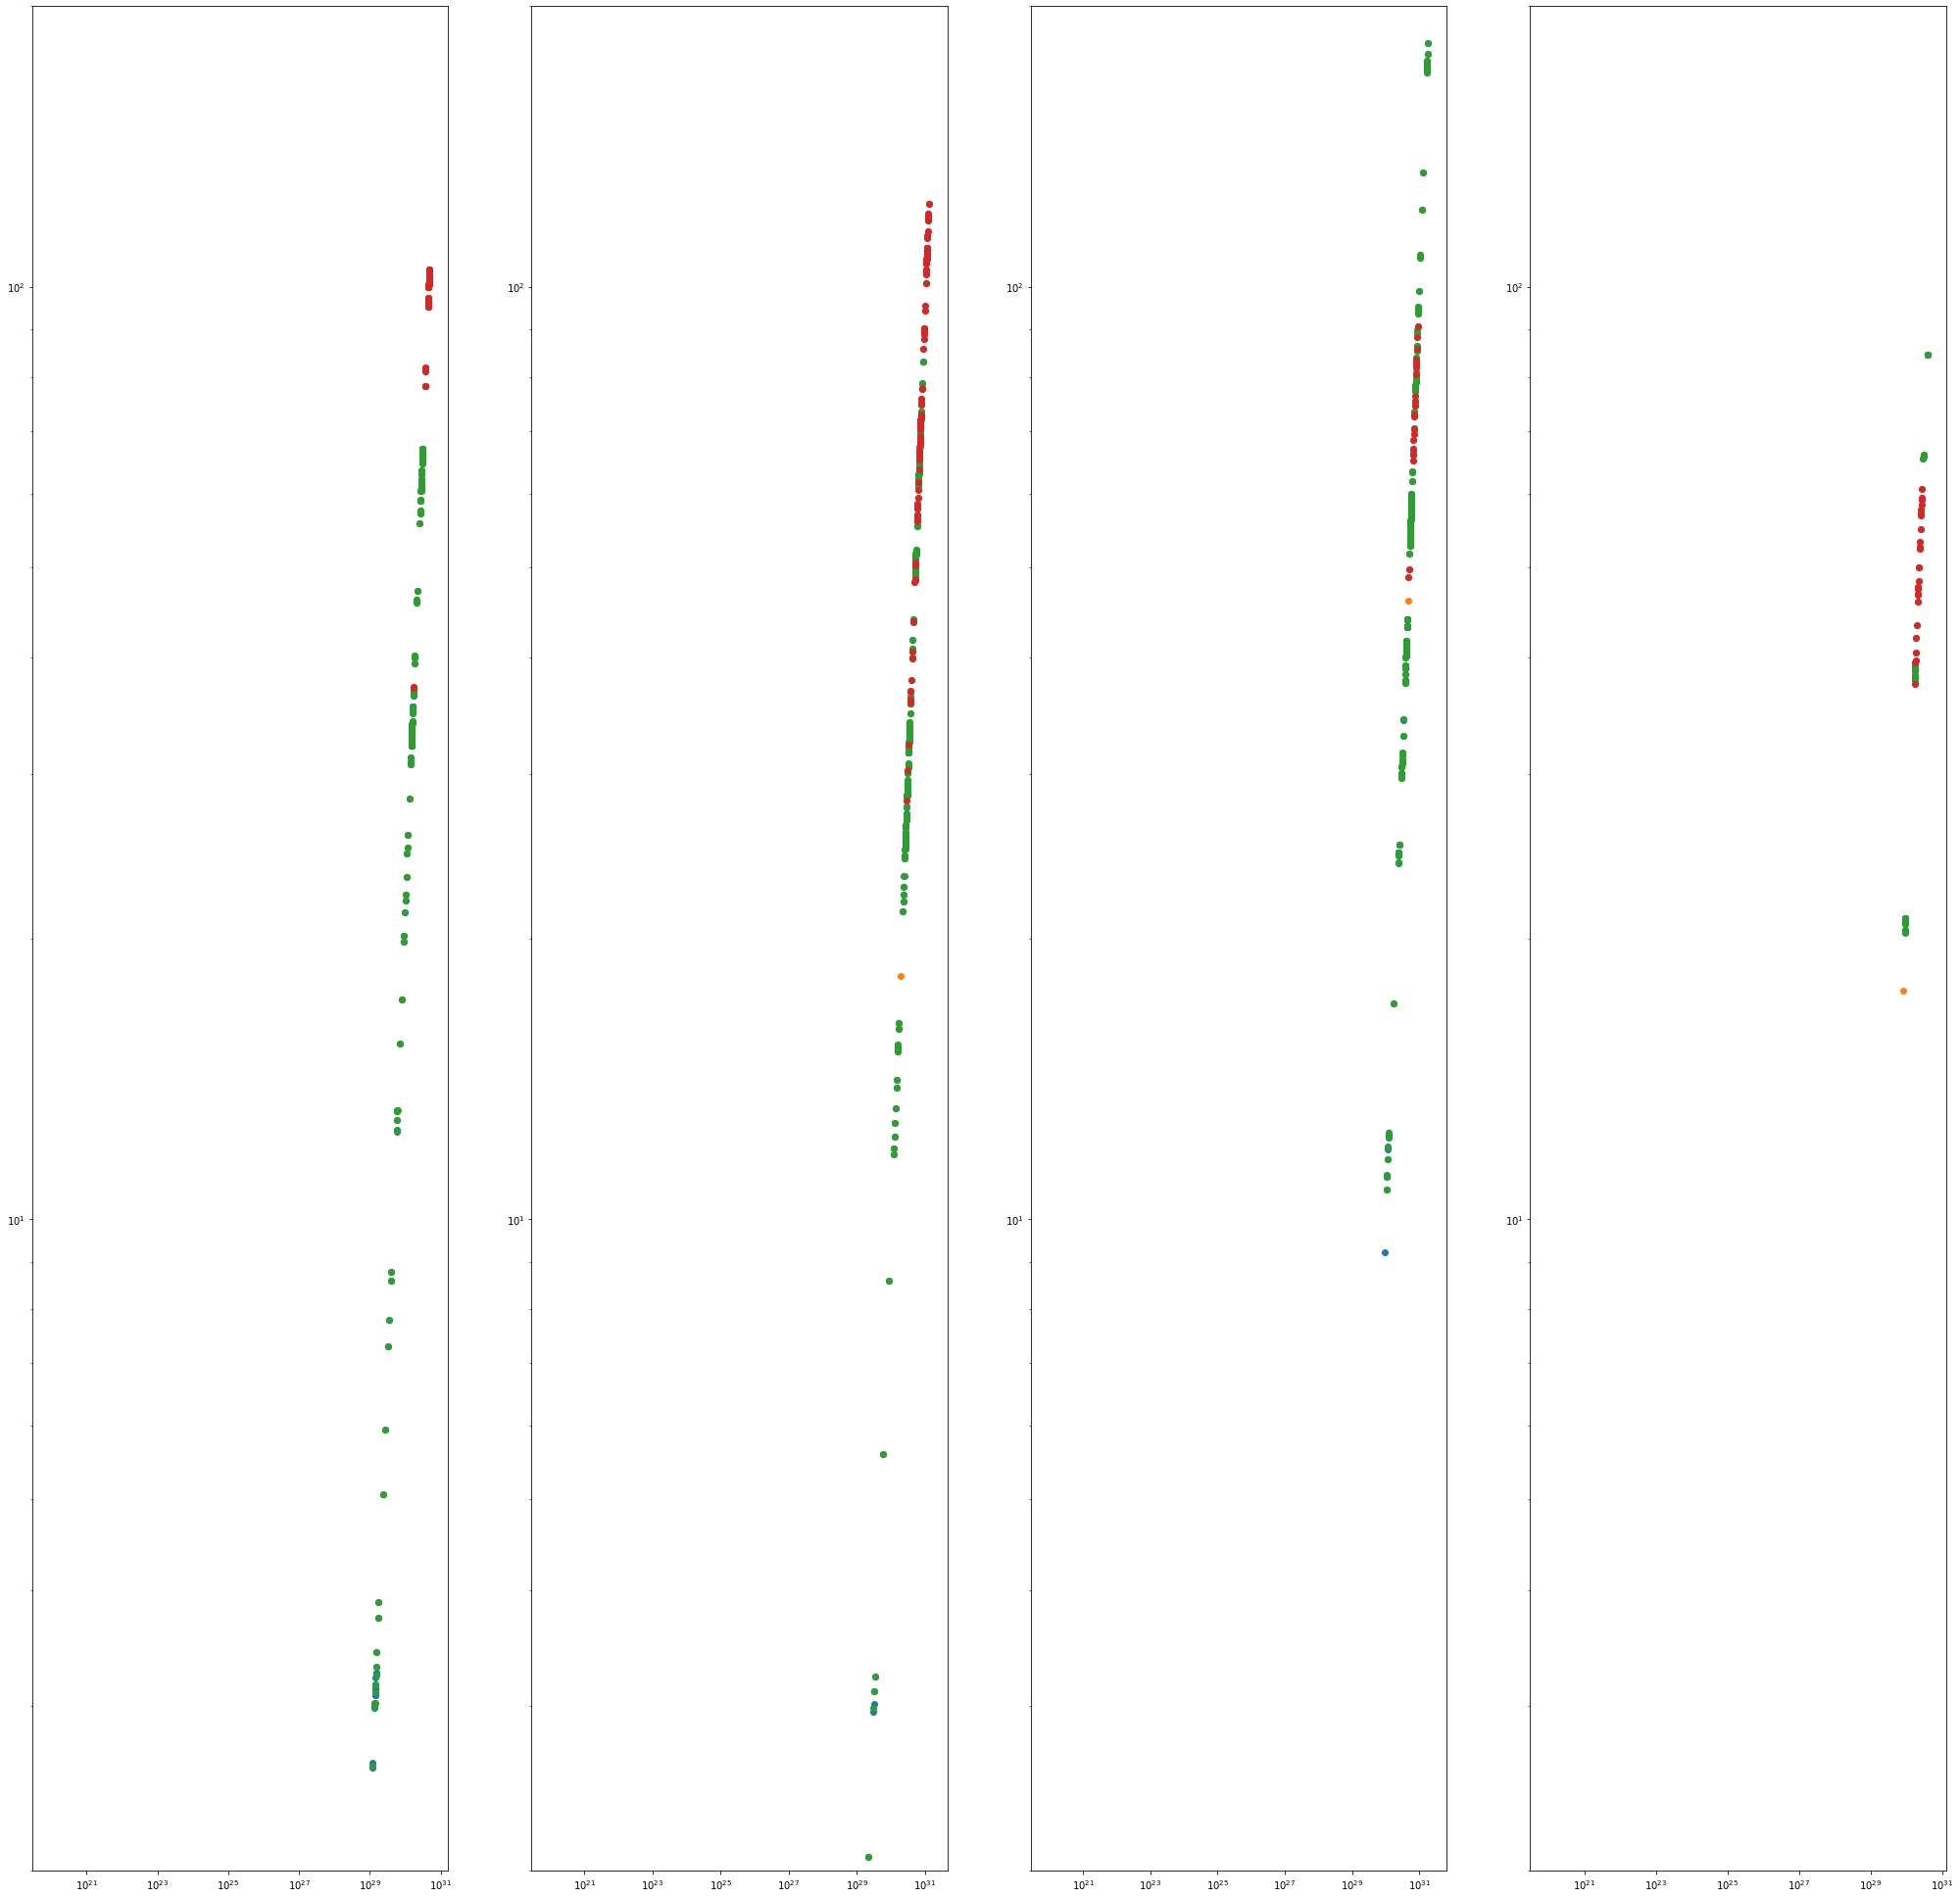

In [2]:
#Column densities

#Assume They are stable under their own gravity and follow the virial theorum (A_vir = 1)





RNames = np.load("RNames_CMZ.npy")
SNames = np.load("SNames_CMZ.npy")
CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0"]
NGCRNames = np.load("RNames.npy")
NGCSNames = np.load("SNames.npy")

#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
ONGCR = [NGCRNames[0],NGCRNames[1],NGCRNames[2],NGCRNames[5]]
ONGCS = [NGCSNames[0],NGCSNames[1],NGCSNames[2],NGCSNames[5]]

Masses= [.0610168,.027,.028,.0620168] #Kg/mol Approximate

Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(35,35))


for i in range(4):
    #Virial energy lines
    
    
    
    
        
    Number_of_bins=1000
    
    NsU=np.linspace(10**20,10**25,Number_of_bins)
    
    A_vir = 1
    f=5/3
    G = 6.67408*10**-11#*u.meter**3*u.kg**-1*u.s**-2# m3 kg-1 s-2
    s2_r=[]
    pc_2_m=3.086*10**16#*u.meter/u.parsec#m/pc
    
    AV_N = 6.02214076*10**23#molecules per mole
    
    Num_Per_Kg = AV_N/Masses[i]
    for t in range(Number_of_bins):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NsU[t]/(5/A_vir/G/f/np.pi)*pc_2_m/100000**2/Num_Per_Kg
        s2_r.append(Sig_sqr_over_R)
        
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    rnameL=RNames[i]+"_Leaves.npy"
    snameL=SNames[i]+"_Leaves.npy"
    rnameB=RNames[i]+"_Branches.npy"
    snameB=SNames[i]+"_Branches.npy"
    
    NGCrnameL=ONGCR[i]+"_Leaves.npy"
    NGCsnameL=ONGCS[i]+"_Leaves.npy"
    NGCrnameB=ONGCR[i]+"_Branches.npy"
    NGCsnameB=ONGCS[i]+"_Branches.npy"
    
    radsL = np.load(rnameL)*10**6#*u.parsec#pc
    sigsL = np.load(snameL)#*u.km/u.s
    rads[0] = np.load(rnameB)*10**6#*u.parsec#pc
    sigs[1][1] = np.load(snameB)#*u.km/u.s
    
    radsNGCL = np.load(NGCrnameL)*10**6#*u.parsec
    sigsNGCL = np.load(NGCsnameL)#*u.km/u.s
    radsNGCB = np.load(NGCrnameB)*10**6#*u.parsec
    sigsNGCB = np.load(NGCsnameB)#*u.km/u.s
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,rads[0])), np.concatenate((sigsL,sigs[1][1]))
    
    #Ns_Calc = 5/A_vir/f/G/np.pi*sigs**2/rads/pc_2_m*100000**2*Num_Per_Kg
    #NGC_Ns_Calc = 5/A_vir/f/G/np.pi*sigsNGC**2/radsNGC/pc_2_m*100000**2*Num_Per_Kg
    Ns_Calc = 5/A_vir/f/G/np.pi*sigs**2/rads/pc_2_m*100000**2*Num_Per_Kg
    NGC_Ns_Calc = 5/A_vir/f/G/np.pi*sigsNGC**2/radsNGC/pc_2_m*100000**2*Num_Per_Kg
    
    
    
    bw = (np.nanmax(Ns_Calc)-np.nanmin(Ns_Calc))/Number_of_bins#N
    
    cp=np.nanmin(Ns_Calc)
    Bin_Rat=[]
    Rat_err=[]
    Bin_Ns=[]
    
    NBin_Rat=[]
    NRat_err=[]
    NBin_Ns=[]
    while(True):
        Ratbin=[]
        if(cp>max(Ns_Calc)):
            break
        for k in range(len(Ns_Calc)):
            if(Ns_Calc[k]>cp and Ns_Calc[k]<cp+bw):
                Ratbin.append(sigs[k]**2/rads[k])
        if(str(np.nanmean(Ratbin))!=str(np.nan) and str(np.nanmean(Ratbin))!= str(np.inf)):
            Bin_Rat.append(np.nanmean(Ratbin))
            Rat_err.append(np.nanstd(Ratbin))
            Bin_Ns.append(cp+bw/2)
        cp+=bw
    
    bw = (np.nanmax(NGC_Ns_Calc)-np.nanmin(NGC_Ns_Calc))/Number_of_bins#N
    
    cp=np.nanmin(NGC_Ns_Calc)
    
    while(True):
        NRatbin=[]
        if(cp>max(NGC_Ns_Calc)):
            break
        for k in range(len(NGC_Ns_Calc)):
            if(NGC_Ns_Calc[k]>cp and NGC_Ns_Calc[k]<cp+bw):
                NRatbin.append(sigsNGC[k]**2/radsNGC[k])
        
        if(str(np.nanmean(NRatbin))!=str(np.nan) and str(np.nanmean(NRatbin))!= str(np.inf)):
            NBin_Rat.append(np.nanmean(NRatbin))
            NRat_err.append(np.nanstd(NRatbin))
            NBin_Ns.append(cp+bw/2)
        cp+=bw
        
        
    fig = plt.figure(1,figsize=(15,15))
    
    ax = pylab.subplot(1,4, i+1)
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    #ax.set_xlim(10**4,10**4.5)
    ax.set_ylim(2,200)
    ax.plot(NsU,s2_r)
    ax.scatter(Ns_Calc,sigs**2/rads)
    ax.scatter(NGC_Ns_Calc,sigsNGC**2/radsNGC)
    ax.scatter(Bin_Ns,Bin_Rat)
    ax.scatter(NBin_Ns,NBin_Rat)
    

In [3]:
def make_plots(Num,Gal,Colors):
    
    RName = np.load("RNames_CMZ.npy")[Num]
    SName = np.load("SNames_CMZ.npy")[Num]
    
    CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0"]
    
    ONGCR = np.load("RNames.npy")[Num]
    ONGCS = np.load("SNames.npy")[Num]
    Bar = np.load("CZM_Beam_Area_Ratios.npy")[Num]
    NBar = np.load("NGC_Beam_Area_Ratios.npy")[Num]
    SpecRes = np.load("CZM_Sres.npy")[Num]
    NSpecRes = np.load("NGC_Sres.npy")[Num]

    SpRes= np.load("CZM_Spres.npy")[Num]
    NSpRes = np.load("NGC_Spres.npy")[Num]
    fig = plt.figure(1,figsize=(35,35))
    #make minimum space line

    ysp=2#SpecRes[i]
    xsp=SpRes*np.sqrt(Bar)#SpRes[i]
    Nysp=2#NSpecRes[i]
    Nxsp=NSpRes*np.sqrt(NBar)




    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]


    Nminsigs=[]
    zeros=[]

    rs=np.linspace(0.1,500,100)
    L=np.linspace(-1,20,10)
    for t in range(100):
        ps = 0
        xsps.append(xsp)
        ysps.append(ysp)

        Nxsps.append(Nxsp)
        Nysps.append(Nysp)

        Nminsigs.append(np.roots([rs[t]**2,-NSpecRes*3*NSpRes**2])[0]) #Solve for the minimum sigma value for a given radius
        minsigs.append(np.roots([rs[t]**2,-SpecRes*3*SpRes**2*2.0475**2*1.3807])[0])

        line.append(rs[t])
        zeros.append(-1)

    rnameNA = RName+"_NA.npy"
    snameNA = SName+"_NA.npy"

    NGCrnameNA = ONGCR+"_NA.npy"
    NGCsnameNA = ONGCS+"_NA.npy"

    radsNA = np.load(rnameNA)*10**6#pc
    sigsNA = np.load(snameNA)

    radsNGCNA = np.load(NGCrnameNA)*10**6
    sigsNGCNA = np.load(NGCsnameNA)



    rnameL=RName+"_Leaves.npy"
    snameL=SName+"_Leaves.npy"
    rnameB=RName+"_Branches.npy"
    snameB=SName+"_Branches.npy"

    NGCrnameL=ONGCR+"_Leaves.npy"
    NGCsnameL=ONGCS+"_Leaves.npy"
    NGCrnameB=ONGCR+"_Branches.npy"
    NGCsnameB=ONGCS+"_Branches.npy"

    radsL = np.load(rnameL)*10**6#pc
    sigsL = np.load(snameL)
    rads[0] = np.load(rnameB)*10**6#pc
    sigs[1][1] = np.load(snameB)

    radsNGCL = np.load(NGCrnameL)*10**6
    sigsNGCL = np.load(NGCsnameL)
    radsNGCB = np.load(NGCrnameB)*10**6
    sigsNGCB = np.load(NGCsnameB)

    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,rads[0])), np.concatenate((sigsL,sigs[1][1]))

    from scipy.optimize import curve_fit

    def func(R,a,b):
        return a*R**(b)

    (poptT, pcovT) =(curve_fit(func, rads,sigs))

    (NpoptT, NpcovT) = (curve_fit(func, radsNGC,sigsNGC ))


    poptNA,pcovNA = curve_fit(func, radsNA, sigsNA)
    NpoptNA,NpcovNA = curve_fit(func, radsNGCNA, sigsNGCNA)

    axA = pylab.subplot(3,5, i+1)

    axNM = pylab.subplot(3,5, i+6)

    axNA = pylab.subplot(3,5, i+11)
    #No abs both
    xsNAp = axNA.scatter(radsNA, sigsNA,c="Black",alpha=.7,label=("CMZ_No_Abs_All "+CMZLs[Num]),marker='x',s=20)
    NxsNAp = axNA.scatter(radsNGCNA, sigsNGCNA,c="Green",alpha=.7,label=("NGC_No_Abs_All "+CMZLs[Num]),marker='x',s=20)
    xsNA=np.linspace(np.nanmin(radsNA),np.nanmax(radsNA),50)
    ysNA=func(xsNA,poptNA[0],poptNA[1])
    xpaNA = axNA.plot(xsNA,ysNA,c='Black',label='CMZ_No_Abs_All')
    
    NxsNA=np.linspace(np.nanmin(radsNGCNA),np.nanmax(radsNGCNA),50)
    NysNA=func(NxsNA,NpoptNA[0],NpoptNA[1])
    NxpaNA = axNA.plot(NxsNA,NysNA,c='Green',label='NGC_No_Abs_All')
    
    er_r=2
    yusNA  = func(xsNA, poptNA[0]+np.sqrt(pcovNA[0][0])*er_r,poptNA[1]+np.sqrt(pcovNA[1][1])*er_r)
    ylsNA  = func(xsNA, poptNA[0]-np.sqrt(pcovNA[0][0])*er_r,poptNA[1]-np.sqrt(pcovNA[1][1])*er_r)
    xpaFNA = axNA.fill_between(xsNA,ylsNA,yusNA,color="Black",alpha=.2)
    
    NyusNA  = func(NxsNA, NpoptNA[0]+np.sqrt(NpcovNA[0][0])*er_r,NpoptNA[1]+np.sqrt(NpcovNA[1][1])*er_r)
    NylsNA  = func(NxsNA, NpoptNA[0]-np.sqrt(NpcovNA[0][0])*er_r,NpoptNA[1]-np.sqrt(NpcovNA[1][1])*er_r)
    NxpaFNA = axNA.fill_between(NxsNA,NylsNA,NyusNA,color="Green",alpha=.2)
    
    
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    ysT=func(xs,poptT[0],poptT[1])
    xpaT = axA.plot(xs,ysT,c='Blue')
    xpas = axA.scatter(rads,sigs,c='Blue',label='CMZ_All',s=10,alpha=.7)
    xpaT2 = axNA.plot(xs,ysT,c='Blue')
    xpas2 = axNA.scatter(rads,sigs,c='Blue',label='CMZ_All',s=7,alpha=.5)
    



    er_r=2
    yusT  = func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsT  = func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaFT = axA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    xpaFT2 = axNA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.2)

    cmzT2F = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.3)
    cmzT2 = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    NysT=func(Nxs,NpoptT[0],NpoptT[1])
    NxpaT = axA.plot(Nxs,NysT,c='Red')
    Nxpas = axA.scatter(radsNGC,sigsNGC,c='Red',label='NGC_All',s=10,alpha=.7)
    NxpaT2 = axNA.plot(Nxs,NysT,c='Red')
    Nxpas2 = axNA.scatter(radsNGC,sigsNGC,c='Red',label='NGC_All',s=7,alpha=.5)

    er_r=2
    NyusT  = func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsT  = func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFT = axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
    NxpaFT2 = axNA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.2)



    #Plot NM data

    NysNM = func(Nxs,C_Ngc,E_Ngc)
    NysNM_U = func(Nxs, C_Ngc+(C_Ngc_Err)*er_r,E_Ngc+(E_Ngc_Err)*er_r)
    NysNM_L = func(Nxs, C_Ngc-(C_Ngc_Err)*er_r,E_Ngc-(E_Ngc_Err)*er_r)

    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC_All')

    Shetty_Exp = [0.64,0.46,.78,-5]
    Shetty_exp_errs = .06

    ShettyCoefs = [2.1,3.8,2.6,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axNM.plot(Nxs,SP,c='Yellow',label='Shetty Values')
    ShettyFill = axNM.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)

    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4

    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2

    NI = func(Nxs,NicoCOCoef(NicoCO_10,NicoCO),NicoCO)
    NIU = func(Nxs,NicoCOCoef(NicoCO_10+NicoCO_10Err*er_r,NicoCO+NicoCOErr*er_r),NicoCO+ NicoCOErr*er_r)
    NIL = func(Nxs,NicoCOCoef(NicoCO_10-NicoCO_10Err*er_r,NicoCO-NicoCOErr*er_r),NicoCO- NicoCOErr*er_r)

    NicoNM = axNM.plot(Nxs,NI,c='Cyan',label='Nico CO_1-0 Values_CMZ')
    NicoFill = axNM.fill_between(Nxs,NIL,NIU,color="Cyan",alpha=.2)

    NNI = func(Nxs,NicoCOCoef(NNicoCO_10,NNicoCO),NNicoCO)
    NNIU = func(Nxs,NicoCOCoef(NNicoCO_10+NNicoCO_10Err*er_r,NNicoCO+NNicoCOErr*er_r),NNicoCO+ NNicoCOErr*er_r)
    NNIL = func(Nxs,NicoCOCoef(NNicoCO_10-NNicoCO_10Err*er_r,NNicoCO-NNicoCOErr*er_r),NNicoCO- NNicoCOErr*er_r)

    NNicoNM = axNM.plot(Nxs,NNI,c='Orange',label='Nico CO_1-0 Values_NGC')
    NNicoFill = axNM.fill_between(Nxs,NNIL,NNIU,color="Orange",alpha=.2)


    axA.set_xlabel("Radius (pc)")
    axA.set_ylabel("Sigma (km/s)")
    axNA.set_xlabel("Radius (pc)")
    axNA.set_ylabel("Sigma (km/s)")
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel("Sigma (km/s)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    axNA.set_yscale('log')
    axNA.set_xscale('log')
    axNM.set_yscale('log')
    axNM.set_xscale('log')
    axA.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.12),xycoords="axes fraction")  
    axNM.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.21),xycoords="axes fraction")
    axNA.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.01,0.21),xycoords="axes fraction")
    stA= ("CMZ: a="+str(round(poptT[0],5))+" =+-" + str(round(np.sqrt(pcovT[0][0]),5)) +", b="+str(round(poptT[1],5))+"+-" + str(round(np.sqrt(pcovT[1][1]),5)) )
    stNA= ("CMZ_No_abs: a="+str(round(poptNA[0],5))+" =+-" + str(round(np.sqrt(pcovNA[0][0]),5)) +", b="+str(round(poptNA[1],5))+"+-" + str(round(np.sqrt(pcovNA[1][1]),5)) )
    stNM= ("CMZ (NM avg): a="+str(round(C_Cmz,5))+" =+-" + str(round(C_Cmz_Err,5)) +", b="+str(round(E_Cmz,5))+"+-" + str(round(E_Cmz_Err,5)) )
    axA.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axA.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigs)*1.4)
    axNA.set_xlim(np.nanmin(radsNA)*.5,np.nanmax(radsNA)*1.1)
    axNA.set_ylim(np.nanmin(sigsNA)*.9,np.nanmax(sigsNA)*1.4)
    axNM.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axNM.set_ylim(np.nanmin(sigs),np.nanmax(sigs)*1.5)
    NstA= ("NGC253: a="+str(round(NpoptT[0],5))+"+-" + str(round(np.sqrt(NpcovT[0][0]),5)) +", b="+str(round(NpoptT[1],5))+"+-" + str(round(np.sqrt(NpcovT[1][1]),5)) )
    NstNM= ("NGC253 (NM avg): a="+str(round(C_Ngc,5))+" =+-" + str(round(C_Ngc_Err,5)) +", b="+str(round(E_Ngc,5))+"+-" + str(round(E_Ngc_Err,5)) )
    NstNA= ("NGC_No_abs: a="+str(round(NpoptNA[0],5))+" =+-" + str(round(np.sqrt(NpcovNA[0][0]),5)) +", b="+str(round(NpoptNA[1],5))+"+-" + str(round(np.sqrt(NpcovNA[1][1]),5)) )
    axA.annotate(s=stA,fontsize=12,xy=(0.01,0.08),xycoords="axes fraction")  

    axA.annotate(s=NstA,fontsize=12,xy=(0.01,0.01),xycoords="axes fraction") 
    
    axNA.annotate(s=stA,fontsize=10,xy=(0.01,0.02),xycoords="axes fraction")  

    axNA.annotate(s=NstA,fontsize=10,xy=(0.01,0.04),xycoords="axes fraction") 

    axA.annotate(s="Beam size",fontsize=12,xy=(0.01,0.2),xycoords="axes fraction",rotation='vertical') 


    #axNM.annotate(s=stNM,fontsize=10,xy=(0.01,0.06),xycoords="axes fraction")  

    #axNM.annotate(s=NstNM,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=10,xy=(0.01,0.11),xycoords="axes fraction")  

    axNM.annotate(s=NstA,fontsize=10,xy=(0.01,0.16),xycoords="axes fraction") 
    
    axNA.annotate(s=stNA,fontsize=10,xy=(0.01,0.06),xycoords="axes fraction")  

    axNA.annotate(s=NstNA,fontsize=10,xy=(0.01,0.08),xycoords="axes fraction") 

    axA.legend(loc='upper left')
    axNM.legend(loc='upper left')
    axNA.legend(loc='upper left')
    axA.title.set_text((CMZLs[Num]+" Velocity Dispersion as a function of Radius"))
    axNM.title.set_text((CMZLs[Num]+" Velocity Dispersion as a function of Radius"))
    axNA.title.set_text((CMZLs[Num]+" Velocity Dispersion as a function of Radius"))

    
    NxminF1,NxminF2,NxminF3,NxminF4 = axA.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,Nxsps,zeros,color="gray",alpha=.1)
    xminF1,xminF2,xminF3,xminF4 = axA.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axB.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),axL.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1),ax4.fill_betweenx(line,xsps,zeros,color="gray",alpha=.1)


    #Plot virial expected sigma-r relation ship, ref: https://arxiv.org/pdf/2008.02518.pdf 5.1


    fig.savefig(bbox_inches='tight',fname="Comparison Plots.jpeg")


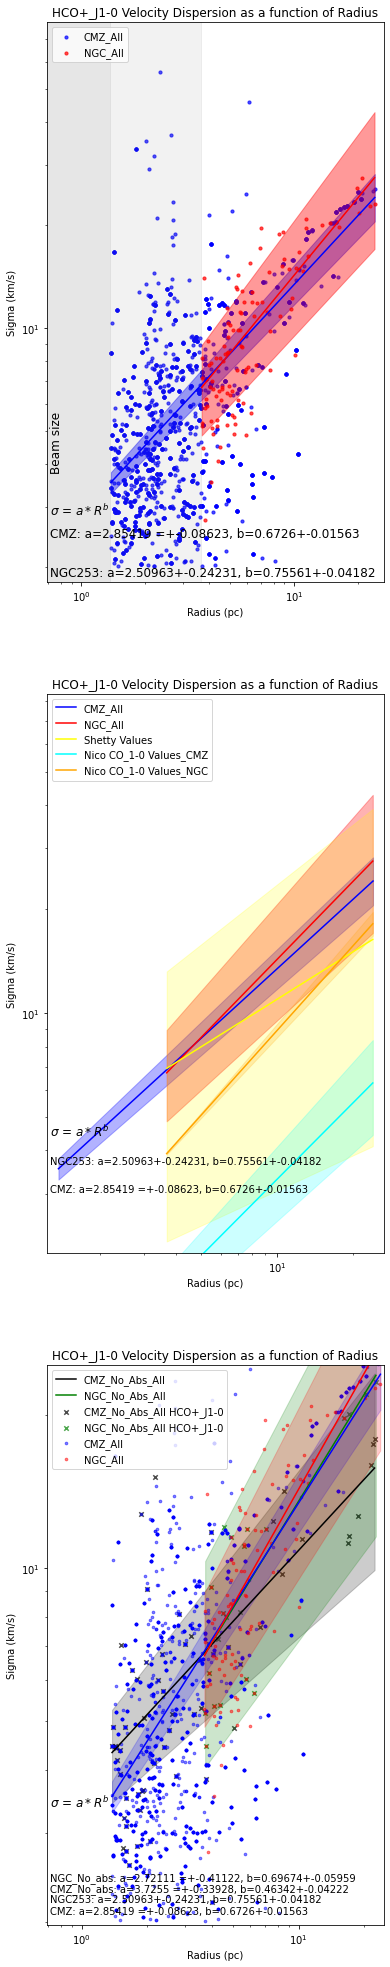

In [45]:
make_plots(0,1,1)